# Creat maps of no health insurance coverage in 4 different categories in 2016
population less than 18 years;
population in 18-64 years, in labor force and employed;
population in 18-64 years, in labor force and unemployed;
population in 18-64 years, not in labor force

clean data

In [42]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import requests, json
import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 3)})

#from urllib.parse import quote
import json
from branca.colormap import linear
import folium
import os

In [43]:
insurance_df = pd.read_csv("data/acs_2016_state.csv")
insurance_df.rename(columns = {"NAME" : "State","state":"STATEFP"}, inplace = True)
insurance_df["STATEFP"] = insurance_df["STATEFP"].astype(int)
insurance_df.drop(insurance_df.columns[[0]], axis=1, inplace=True)
insurance_df.head()

,DP03_0096PE,DP03_0097PE,DP03_0098PE,DP03_0099PE,State,STATEFP,DP03_0101PE,DP03_0106PE,DP03_0107PE,DP03_0108PE,DP03_0111PE,DP03_0112PE,DP03_0113PE,DP03_0116PE,DP03_0117PE,DP03_0118PE
0,90.9,67.9,36.9,9.1,Alabama,1,2.4,85.0,6.5,11.4,44.1,24.6,35.4,53.3,41.7,16.2
1,86.0,67.3,29.4,14.0,Alaska,2,10.0,78.5,11.1,15.2,44.5,29.2,31.1,50.6,32.2,22.8
2,90.0,62.2,39.7,10.0,Arizona,4,7.3,76.0,13.9,12.8,35.0,45.1,22.9,47.5,43.3,14.7
3,92.1,62.0,43.2,7.9,Arkansas,5,3.6,79.7,12.7,10.8,37.1,38.6,28.4,46.3,51.6,11.3
4,92.7,63.0,38.9,7.3,California,6,2.9,76.7,16.2,9.5,40.3,44.7,17.8,50.0,44.1,11.1


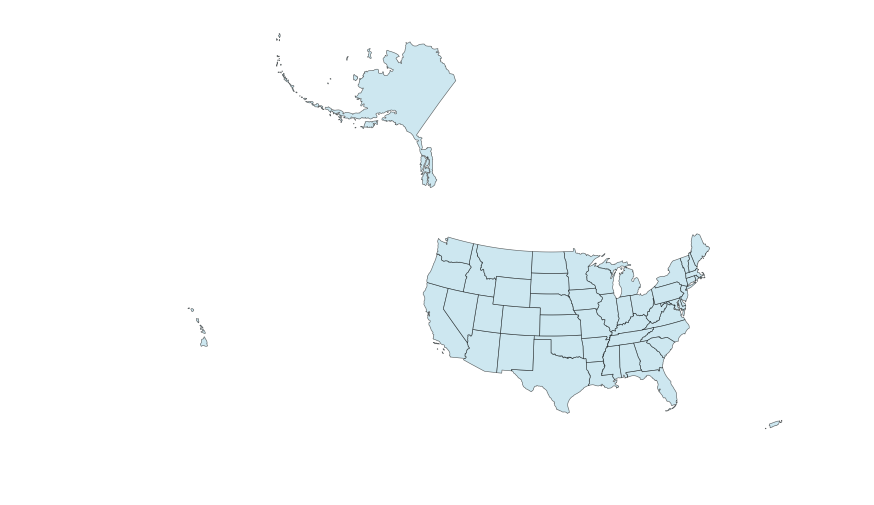

In [44]:
geo_df = gpd.read_file("data/cb_2016_us_state_20m/cb_2016_us_state_20m.shp")
#geo_df.set_index(geo_df["STATEFP"].astype(int), inplace = True)
geo_df["STATEFP"] = geo_df["STATEFP"].astype(int)
geo_df.to_crs(epsg = 2163).plot(facecolor = "lightblue", alpha = 0.6, edgecolor = "black").set_axis_off()

In [45]:
geo_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,23,01779787,0400000US23,23,ME,Maine,00,79885221885,11748755195,"(POLYGON ((-68.92401 43.885407, -68.8747839999..."
1,15,01779782,0400000US15,15,HI,Hawaii,00,16634100855,11777698394,"(POLYGON ((-156.049651 19.780452, -156.006267 ..."
2,4,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,5,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.617919 36.499414, -94.3612029999..."
4,10,01779781,0400000US10,10,DE,Delaware,00,5047194742,1398720828,"POLYGON ((-75.773786 39.7222, -75.753227999999..."


In [46]:
geo_merge = geo_df.merge(insurance_df, how='inner', on = "STATEFP")
geo_merge.rename(columns = {"NAME" : "STATE"}, inplace = True)
geo_merge.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,STATE,LSAD,ALAND,AWATER,geometry,...,DP03_0101PE,DP03_0106PE,DP03_0107PE,DP03_0108PE,DP03_0111PE,DP03_0112PE,DP03_0113PE,DP03_0116PE,DP03_0117PE,DP03_0118PE
0,23,01779787,0400000US23,23,ME,Maine,00,79885221885,11748755195,"(POLYGON ((-68.92401 43.885407, -68.8747839999...",...,4.6,82.9,8.7,10.8,40.8,25.8,35.8,47.9,49.8,10.7
1,15,01779782,0400000US15,15,HI,Hawaii,00,16634100855,11777698394,"(POLYGON ((-156.049651 19.780452, -156.006267 ...",...,2.2,89.3,10.3,3.7,47.9,36.9,17.9,60.0,40.2,7.2
2,4,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",...,7.3,76.0,13.9,12.8,35.0,45.1,22.9,47.5,43.3,14.7
3,5,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.617919 36.499414, -94.3612029999...",...,3.6,79.7,12.7,10.8,37.1,38.6,28.4,46.3,51.6,11.3
4,10,01779781,0400000US10,10,DE,Delaware,00,5047194742,1398720828,"POLYGON ((-75.773786 39.7222, -75.753227999999...",...,3.1,83.0,11.3,7.6,40.0,48.8,14.0,58.4,40.6,7.7


plot

In [47]:
us_states = os.path.join('data', 'us-states.json')
geo_json_data = json.load(open(us_states))

In [63]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    geo_json_data,
    name='basemap',
    style_function=lambda feature: {
        'fillColor': '#fcfcfc',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

In [64]:
colormap = linear.YlGn.scale(0,30)

print(colormap(5.0))

colormap

#d9f0a3


In [65]:
geo_merge_dict_1 = geo_merge.set_index('STUSPS')['DP03_0101PE']   # population less than 18 years;
geo_merge_dict_2 = geo_merge.set_index('STUSPS')['DP03_0108PE']   # population in 18-64 years, in labor force and employed;
geo_merge_dict_3 = geo_merge.set_index('STUSPS')['DP03_0113PE']   # population in 18-64 years, in labor force and unemployed;
geo_merge_dict_4 = geo_merge.set_index('STUSPS')['DP03_0118PE']   # population in 18-64 years, not in labor force

In [66]:
folium.GeoJson(
    geo_json_data,
    name='population under 18 years',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_1[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [67]:
folium.GeoJson(
    geo_json_data,
    name='population in 18-64 years, in labor force and employed',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [68]:
folium.GeoJson(
    geo_json_data,
    name='population in 18-64 years, in labor force and unemployed',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_3[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [69]:
folium.GeoJson(
    geo_json_data,
    name='population in 18-64 years, and not in labor force',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_4[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [70]:
colormap.caption = 'Percent with No Health Insurance Coverage'
colormap.add_to(m)
folium.LayerControl().add_to(m)

m

In [71]:
m.save(os.path.join('persent_no_insurance_category.html'))